# Submission on test2 
## FROC: Val 0.66, LB 0.678

Detector: 062017_HU_pres

Preprocessing: HU preserved in dilated part of mask

Optimizer: Adam

Training patients: Blacklisted only 2 patients with single lung segmentations with annotations in other lung

Testing patients: All test2

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import evaluator
import matplotlib.pyplot as plt

## Find checkpoint with best validation FROC for testing.

In [2]:
ignore_val = ['LKDS-00602','LKDS-00926']
ignore_test2 = ['LKDS-01343','LKDS-01068']

In [5]:
tpr_lists = []
pth_lists = []
tpr_lists_not_ign = []
pth_lists_not_ign = []
ckpts = range(100,151,10)
for i in ckpts:
    e = evaluator.Evaluator('val/0/%s/bbox/test_%s' % (i, i), 'val', 'split/val_0.npy', ckpt=i,pbb_cutoff=0.5)
#     fp_per_scan, tprs, pths, score = e.froc(ignore=ignore_val)
#     tpr_lists.append(tprs)
#     pth_lists.append(pths)
    
    _, tprs_not_ign, pths_not_ign, score = e.froc()
    tpr_lists_not_ign.append(tprs_not_ign)
    pth_lists_not_ign.append(pths_not_ign)
    
    print i, 'all:', score

loaded 2613 pbbs
saved pbbs missed 23 out of 304 annotations (7.57%)
NLF: 0.125, TPR: 0.460526315789, PROB_TH: 0.997703202955
NLF: 0.25, TPR: 0.552631578947, PROB_TH: 0.996459520901
NLF: 0.5, TPR: 0.664473684211, PROB_TH: 0.993786453238
NLF: 1.0, TPR: 0.753289473684, PROB_TH: 0.98953009891
NLF: 2.0, TPR: 0.8125, PROB_TH: 0.979413718616
NLF: 4.0, TPR: 0.881578947368, PROB_TH: 0.942365569586
NLF: 8.0, TPR: 0.914473684211, PROB_TH: 0.809350666531
avg TPR: 0.71992481203
100 all: 0.71992481203
loaded 2252 pbbs
saved pbbs missed 25 out of 304 annotations (8.22%)
NLF: 0.125, TPR: 0.424342105263, PROB_TH: 0.998654047948
NLF: 0.25, TPR: 0.549342105263, PROB_TH: 0.997591176421
NLF: 0.5, TPR: 0.680921052632, PROB_TH: 0.995438896552
NLF: 1.0, TPR: 0.759868421053, PROB_TH: 0.991296703149
NLF: 2.0, TPR: 0.835526315789, PROB_TH: 0.979296720967
NLF: 4.0, TPR: 0.881578947368, PROB_TH: 0.932272570567
NLF: 8.0, TPR: 0.914473684211, PROB_TH: 0.742834370418
avg TPR: 0.720864661654
110 all: 0.720864661654
l

In [22]:
tpr_lists_arr = np.array(tpr_lists)
avg_tprs = np.mean(tpr_lists_arr, axis=1)
best_ckpt = ckpts[np.argmax(avg_tprs)]
print best_ckpt, np.max(avg_tprs)

80 0.662772172066


## Does ignore help FROC? (sometimes)

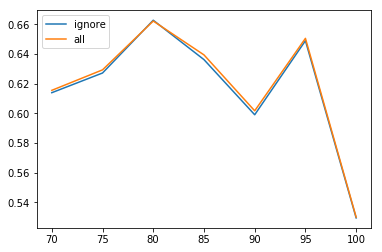

In [23]:
plt.plot(ckpts, np.mean(tpr_lists,axis=1),label='ignore')
plt.plot(ckpts, np.mean(tpr_lists_not_ign,axis=1),label='all')
plt.legend(loc='best')
plt.show()

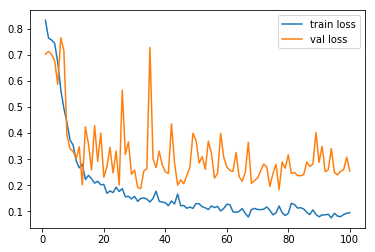

In [32]:
import trainstats as ts
d = ts.DetectorStats('/home/danielrk/tc/nod/training/detector/results/062017_HU_pres/log')
plt.plot(d.epoch, d.t_loss, label='train loss')
plt.plot(d.epoch, d.v_loss, label='val loss')
plt.legend(loc='best')
plt.show()

In [35]:
for i in range(5,105,5):
    print d.epoch[i-1],d.v_tnr[i-1]

5 99.99886525
10 99.99357203
15 99.99460135
20 99.9939755
25 99.98698446
30 99.99427268
35 99.99577354
40 99.99191171
45 99.98712912
50 99.99675581
55 99.99565136
60 99.99495876
65 99.99392314
70 99.99462417
75 99.99534675
80 99.99457028
85 99.99379987
90 99.99637551
95 99.99461595
100 99.99105203


## Test2 submission

In [26]:
print best_ckpt
e = evaluator.Evaluator('062017_HU_pres', 'test2', ckpt=best_ckpt)
e.sub(k=30, save=True)

80
Saving submission to /home/danielrk/tc/nod/training/detector/results/062017_HU_pres/sub/_080_1498008059.csv


,seriesuid,coordX,coordY,coordZ,probability
0,LKDS-01004,-71.903638,-75.361895,154.069326,0.999282
1,LKDS-01004,-91.987079,-82.573811,178.253917,0.977346
2,LKDS-01004,23.837873,-227.576438,111.002392,0.915797
3,LKDS-01004,-31.735699,-119.265244,138.043856,0.832244
4,LKDS-01004,-72.776876,-155.497501,42.709685,0.822414
5,LKDS-01004,52.104666,-79.663455,233.619147,0.819945
6,LKDS-01004,-95.710435,-106.922970,109.583762,0.813985
7,LKDS-01004,-80.013530,-235.651315,182.753697,0.794372
8,LKDS-01004,-74.463140,-72.868623,149.734123,0.786112
9,LKDS-01004,55.908379,-79.501712,233.856200,0.785486


# Original SGD learning curve

Also unstable wrt val loss, but smooths out at 50 and 80 epochs because learning rate is reduced.

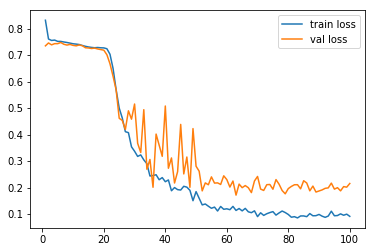

In [31]:
d = ts.DetectorStats('/home/danielrk/tc/nod/training/detector/results/05-31-17/log')
plt.plot(d.epoch, d.t_loss, label='train loss')
plt.plot(d.epoch, d.v_loss, label='val loss')
plt.legend(loc='best')
plt.show()

In [ ]:
e = evaluator.Evaluator('062017_HU_pres', 'val', ckpt=best_ckpt)